# List of Contents
### 01. Importing libraries and data
### 02. Creating Visualizations
### 03. Main Task Questions

# 01. Importing libraries and data

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Import data
path = r'C:\Users\Lawrence\Documents\Career Foundry Projects\Data Immersion\Achievement #4\2023 Instacart Basket Analysis'
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

# 02. Creating Visualizations

<Axes: xlabel='orders_day_of_the_week'>

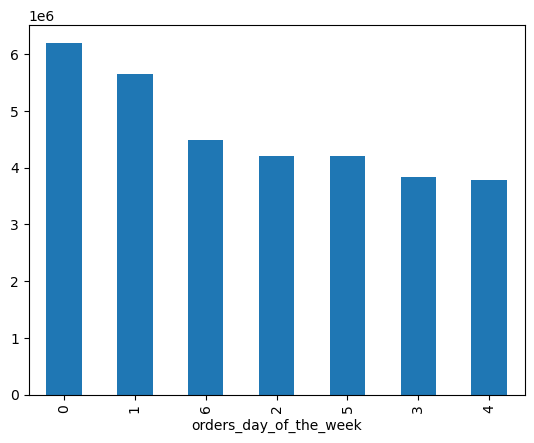

In [3]:
# Create a bar chart
ords_prods_merge['orders_day_of_the_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_the_week'>

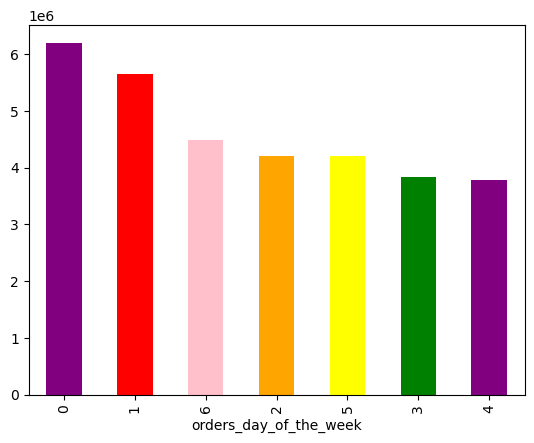

In [4]:
# Add color to the bar chart
ords_prods_merge['orders_day_of_the_week'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green'])

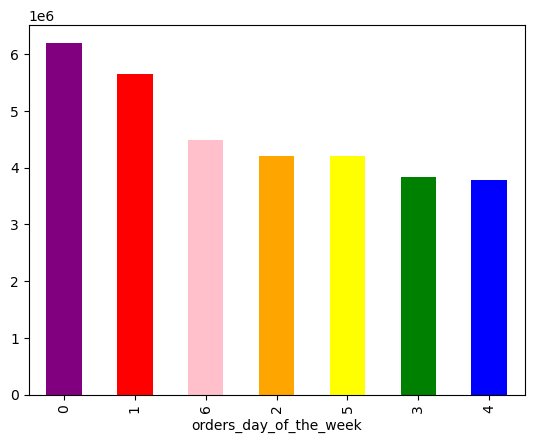

In [5]:
# Export the bar chart
bar = ords_prods_merge['orders_day_of_the_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [6]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_down.png'))

## -- Note: The following segment from the instruction of the reading has been obsoleted due to data cleaning applied retroactively. --

<Axes: ylabel='Frequency'>

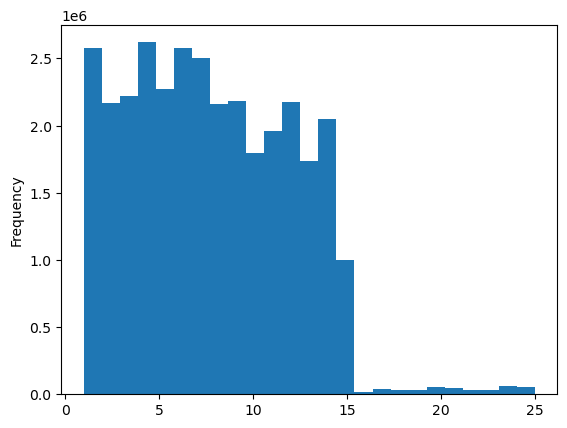

In [7]:
# Create a histogram
ords_prods_merge['prices'].plot.hist(bins = 25)

In [8]:
ords_prods_merge['prices'].describe()

count    3.239973e+07
mean     7.790994e+00
std      4.241809e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='prices', ylabel='prices'>

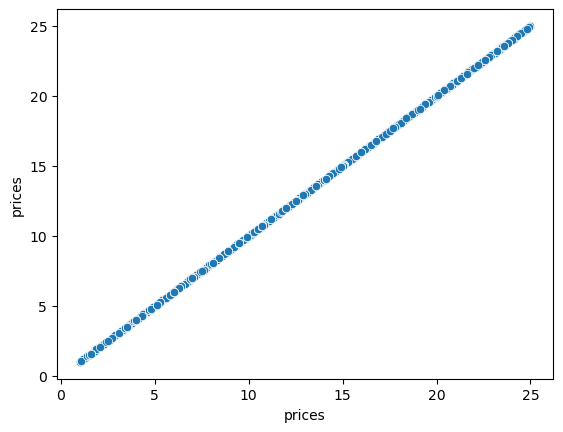

In [9]:
# Create a scatterplot
sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_merge)

In [10]:
ords_prods_merge[['order_id', 'user_id','prices']].loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,prices


## -- End of obsoleted segment --

In [11]:
# Mark rows with outlier prices as missing
ords_prods_merge.loc[ords_prods_merge['prices'] > 100, 'prices'] = np.nan

In [12]:
ords_prods_merge['prices'].max()

25.0

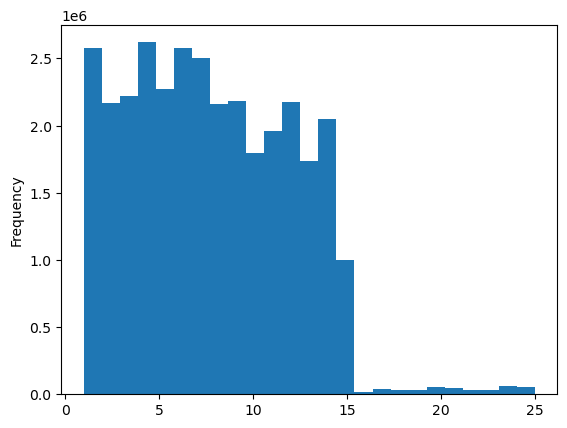

In [13]:
# Create histogram again
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

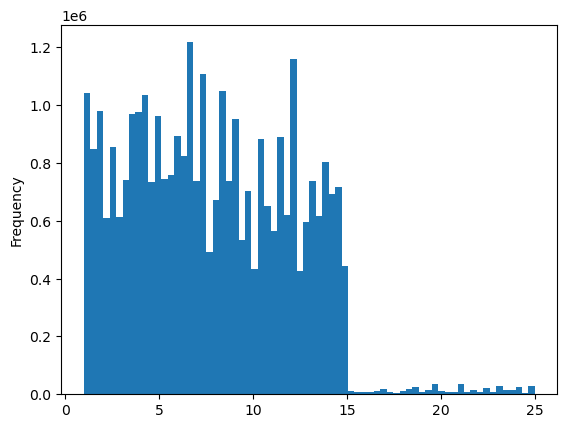

In [14]:
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [15]:
# Export histogram
hist_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png'))

In [16]:
# Create a list holding True/False values to the test np.random.rand() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [17]:
# Store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]

In [18]:
# Store 30% of the sample in the dataframe small
small = ords_prods_merge[~dev]

In [19]:
len(ords_prods_merge)

32404859

In [20]:
len(big) + len(small)

32404859

In [21]:
df_2 = small[['orders_day_of_the_week', 'prices']]

In [22]:
df_2.head()

,orders_day_of_the_week,prices
0,2,9.0
2,3,9.0
3,4,9.0
6,1,9.0
10,2,12.5


C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

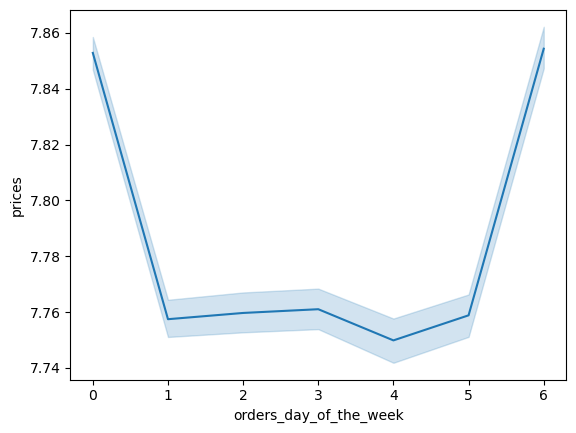

In [23]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_the_week', y = 'prices')

# 03. Main Task Questions

In [24]:
# Dataset preview
ords_prods_merge.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order_number,product_id,add_to_cart_order,reordered,product_name,...,avg_price_of_user,spending_level,median_days_since_prior_order,ordering_regularity,gender,state,age,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,6.367797,Low spender.,20.5,Non-frequent customer.,Female,Alabama,31,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,6.367797,Low spender.,20.5,Non-frequent customer.,Female,Alabama,31,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,6.367797,Low spender.,20.5,Non-frequent customer.,Female,Alabama,31,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,6.367797,Low spender.,20.5,Non-frequent customer.,Female,Alabama,31,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,6.367797,Low spender.,20.5,Non-frequent customer.,Female,Alabama,31,3,married,40423


In [25]:
ords_prods_merge.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_the_week',
       'order_hour_of_day', 'days_since_prior_order_number', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price_of_user', 'spending_level', 'median_days_since_prior_order',
       'ordering_regularity', 'gender', 'state', 'age', 'n_dependants',
       'fam_status', 'income'],
      dtype='object')

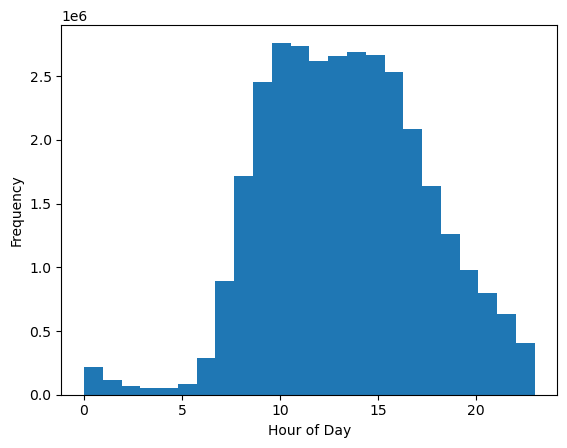

In [7]:
# Step 3
# Create a histogram of the "order_hour_of_day" column
hist_hour = ords_prods_merge['order_hour_of_day'].plot.hist(bins = 24)
plt.xlabel("Hour of Day")
hist_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_hour.png'))

The histogram demonstrates that the frequency of sales peaks from the late morning to the mid-afternoon, after which they gradually drop.

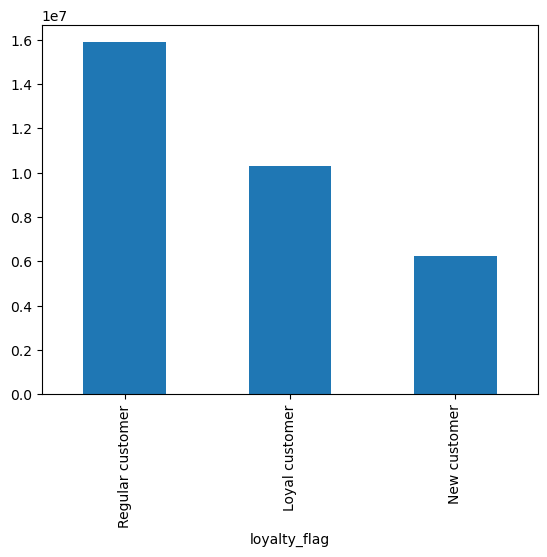

In [32]:
# Step 4
# Create a bar graph from the "loyalty_flag" column
bar_loyalty = ords_prods_merge['loyalty_flag'].value_counts().plot.bar()

In [28]:
# Step 5
# Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.
df_prices_sample = small[['order_hour_of_day', 'prices']]
df_prices_sample.head()

,order_hour_of_day,prices
0,8,9.0
2,12,9.0
3,7,9.0
6,9,9.0
10,8,12.5


C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

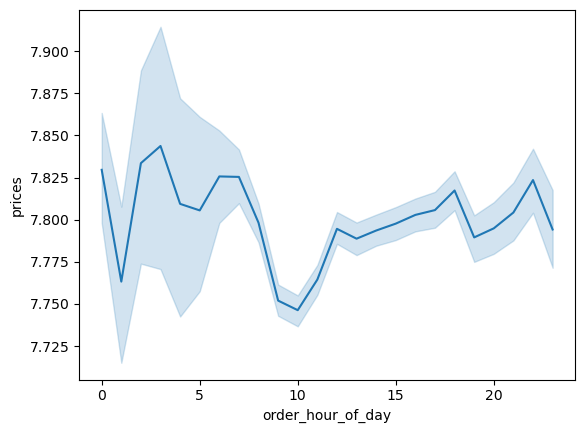

In [29]:
line_hour_prices = sns.lineplot(data = df_prices_sample, x = 'order_hour_of_day', y = 'prices')

Looking at the periods of high confidence (from about 7 in the morning until midnight), it appears that expenditure hits a low at around 10 AM, but then sharply rises again by noon, and gradually increases over the course of the day.

C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

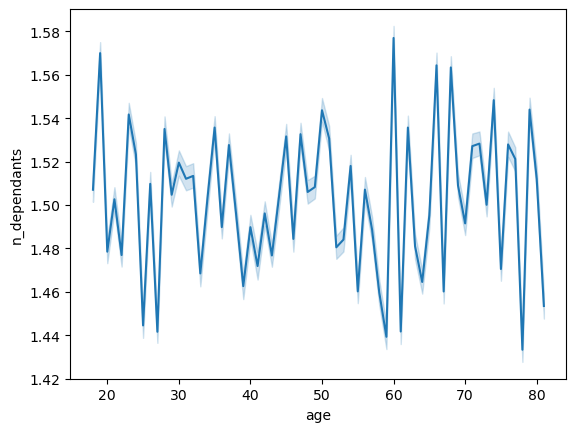

In [30]:
# Step 6
# Create a line chart to determine whether there is a connection between age and the number of dependents
df_age_dependants = small[['age', 'n_dependants']]
line_age_dependants = sns.lineplot(data = df_age_dependants, x = 'age', y = 'n_dependants')

There does not appear to be any correlation between age and the number of dependents.

C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


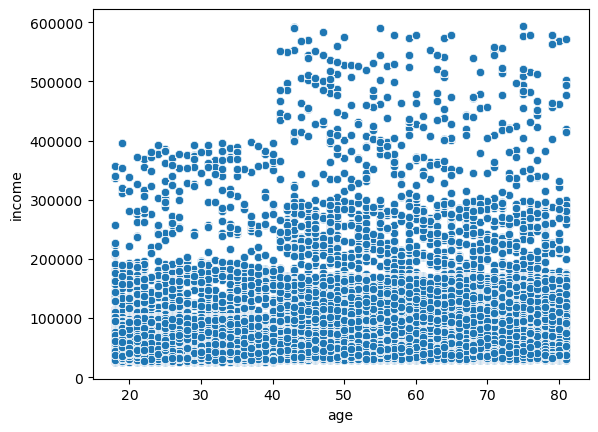

In [4]:
# Step 7
# Create a scatterplot to explore the relationship between age and spending power (income)
scatter_age_inc = sns.scatterplot(x = 'age', y = 'income', data = ords_prods_merge)

There is a positive correlation between age and income. There is greater density in the income ranges of 200,000 to 300,000 when age exceeds 40. Similarly, there are only customers with an income higher than 400,000 once age exceeds 40.

In [5]:
scatter_age_inc.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_age_income.png'))

In [6]:
# Export visualizations
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_days_prices.png'))
hist_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_hour.png'))
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty.png'))
line_hour_prices.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_hour_prices.png'))
line_age_dependants.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_dependants.png'))
scatter_age_inc.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_age_income.png'))

NameError: name 'line' is not defined